<a href="https://colab.research.google.com/github/JazminPineda/GrupoEDatos/blob/main/jaz__MLS_Salary_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Integrantes**


## Objetivo:
Realizar un modelado completo para un problema de clasificación y un problema de regresión, comparando diferentes técnicas y procedimientos explicados durante el desarrollo de la materia.
## Instrucciones Generales:
1.	Cada grupo deberá **elegir un dataset de clasificación y otro de regresión** (cada grupo deberá trabajar con datasets distintos). Se les sugiere usar datasets de fuentes como Kaggle, UCI Machine Learning Repository o cualquier otro repositorio que consideren relevante.
2.	El objetivo es comparar distintos modelos y técnicas vistas en la materia. Deberán aplicar técnicas de preprocesamiento, selección de características, y validar el rendimiento de los modelos elegidos utilizando las métricas adecuadas.
3.	El trabajo se debe entregar en formato Jupyter Notebook, o cualquier otro que consideren conveniente, e incluir todas las etapas de un análisis de minería de datos, desde la exploración inicial hasta la evaluación del rendimiento de los modelos.

## 1.  Descripción del Problema. 📊

El futbol es uno de los deportes con mayor entretenimiento a nivel mundial, algunos jugadores son super reconocidos sin embargo, hay otros jugadores que tienen destrezas y tambien desempeñan un rol importante. Sin embargo a nivel salarial vemos que los más famosos tienen una gran brecha de diferencia salarial y que algunos Clubes intercambian sus jugadores.

El intercambio de jugadores juega un papel importante para mantener la sostenibilidad financiera de los clubes de fútbol. Como los clubes tienen ciertos presupuestos para la adquisición de jugadores, gastar +5 de millones en un jugador significa que tendrán menos dinero para gastar en otros jugadores. Sin embargo, gastar menos dinero o gastar más en jugadores no sería un modelo de negocios óptimo para el club. Los clubes buscan adquirir jugadores que generen el mayor valor. Al igual que en el mercado de valores, la gente quiere comprar lo que es barato pero con un alto potencial de crecimiento y venderlo a un precio más alto. Por lo tanto, en este informe, nuestro objetivo es explicar los salarios de los jugadores de la MLS y, con la esperanza de predecir el salario base (base_salary) de un jugador de la MLS basándonos en características como su posición, club y año de contrato?

Para responder a estas preguntas se realizará un análisis de los datos salariales en la Major League Soccer. Dado el papel marginal del análisis estadístico en el fútbol y luego se establecera tecnicas de medición para evaluar nuestro modelo para que sea loa más eficiente posible.

## Datos

Los datos de los jugadores de la MLS se recopilan de https://github.com/data-is-plural/mls-salaries.
El conjunto de datos contiene un total de 5553 de datos de la MLS,
y proporciona información sobre el salario del jugador, el club, y un historico de 10 años.


+ AM – centrocampista ofensivo.
+ SW – barredora. Un jugador con tareas tanto defensivas como ofensivas. Se le da un papel libre y puede servir hasta cierto punto como creador de juego y también debe retroceder detrás de la línea defensiva cuando ataca el lado opuesto.
+ CB – defensa central. Normalmente se utilizan uno o dos centrales en una formación.
+ CF – delantero centro. El atacante que se posiciona en el medio de la línea ofensiva. En el fútbol moderno se ha vuelto común usar solo uno o dos atacantes; por lo tanto, un delantero centro puede no ser muy relevante como descripción.
+ LB – lateral izquierdo. Se coloca en la parte izquierda de la línea defensiva.
+ RB – lateral derecho. Se coloca en la parte derecha de la línea defensiva.
+ FB – lateral. Otro nombre para el jugador defensivo que juega en el lado izquierdo (lateral izquierdo) o en el lateral derecho (lateral derecho).
+ LWB – lateral izquierdo atrás. Posicionado delante del lateral izquierdo y fuera en el “ala”.RWB: lateral derecho hacia atrás. Situado delante del lateral derecho.D- defensor.
+ DM – centrocampista defensivo.
+ CM – centrocampista central.F- adelante.GK – portero. A menudo solo se usa  G.LW – ala izquierda. Similar al lateral izquierdo, pero normalmente con una labor principalmente ofensiva. En otras palabras, un centrocampista de banda ofensivo.
+ RW – ala derecha. Lo mismo que el ala izquierda, pero en el ala opuesta.
+ M – centrocampista.
+ WF – ala hacia adelante. Un atacante en posición ofensiva en la banda. Al igual que con el delantero centro, el alero ha sido menos común en el juego moderno, pero podría estar presente en una formación 4-3-3.
+ ST – Delantero. Una función similar a la de centro y lateral delantero.
+ IF – Delantero interior. En los viejos tiempos, una línea ofensiva podía constar de cinco atacantes e incluir dos delanteros interiores colocados entre los delanteros laterales y el delantero centro y normalmente un poco detrás de los otros tres.
+ OL – Exterior izquierdo. Lo mismo que izquierdista.
+ O – Exterior derecho. Lo mismo que izquierdista.

Tomado en https://www.unideportes.edu.co/abreviaturas-en-futbol/

## 2. Análisis Exploratorio de Datos (EDA)

### Preprocesamiento de datos
En esta sección, primero veremos rápidamente el conjunto de datos que vamos a analizar y veremos cómo podemos mejorarlo y hacerlo más eficiente para un análisis posterior.

In [ ]:
# Librerias a usar

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [ ]:

# Lectura masiva desde github los csv`s

dfs = []
for year in range(2007,2018,1):
  carpeta = f'https://raw.githubusercontent.com/data-is-plural/mls-salaries/refs/heads/master/csvs/mls-salaries-{year}.csv'
  print(carpeta)
  df_temp = pd.read_csv(carpeta)
  df_temp['year'] = year # se agrega columna año
  dfs.append(df_temp)
df = pd.concat(dfs)
df


https://raw.githubusercontent.com/data-is-plural/mls-salaries/refs/heads/master/csvs/mls-salaries-2007.csv
https://raw.githubusercontent.com/data-is-plural/mls-salaries/refs/heads/master/csvs/mls-salaries-2008.csv
https://raw.githubusercontent.com/data-is-plural/mls-salaries/refs/heads/master/csvs/mls-salaries-2009.csv
https://raw.githubusercontent.com/data-is-plural/mls-salaries/refs/heads/master/csvs/mls-salaries-2010.csv
https://raw.githubusercontent.com/data-is-plural/mls-salaries/refs/heads/master/csvs/mls-salaries-2011.csv
https://raw.githubusercontent.com/data-is-plural/mls-salaries/refs/heads/master/csvs/mls-salaries-2012.csv
https://raw.githubusercontent.com/data-is-plural/mls-salaries/refs/heads/master/csvs/mls-salaries-2013.csv
https://raw.githubusercontent.com/data-is-plural/mls-salaries/refs/heads/master/csvs/mls-salaries-2014.csv
https://raw.githubusercontent.com/data-is-plural/mls-salaries/refs/heads/master/csvs/mls-salaries-2015.csv
https://raw.githubusercontent.com/dat

,club,last_name,first_name,position,base_salary,guaranteed_compensation,year
0,CHI,Armas,Chris,M,225000.0,225000.00,2007
1,CHI,Banner,Michael,M,12900.0,12900.00,2007
2,CHI,Barrett,Chad,F,41212.5,48712.50,2007
3,CHI,Blanco,Cuauhtemoc,F,2492316.0,2666778.00,2007
4,CHI,Brown,C.J.,D,106391.0,106391.00,2007
...,...,...,...,...,...,...,...
611,VAN,Tornaghi,Paolo,GK,80000.0,80000.00,2017
612,VAN,Waston,Kendall,D,350000.0,368125.00,2017
613,VAN,Williams,Sheanon,D,175000.0,184000.00,2017
614,NaN,Babouli,Mo,F,54075.0,54075.00,2017


Información de datos básicos, número de registros y número de variables.


| Variable | Tipo | Descripción |
|----------|----------|----------|
| club    | Categóricos Nominal  | Acrónimo club  |
| last_name   | Categóricos Nominal  | Apellido de jugador   |
| first_name    | Categóricos Nominal   | Nombre de jugador  |
| position    | Categóricos Ordinal  | Cell 9   |
| base_salary    | Numérica Continua    | Salario Base  |
| guaranteed_compensation    | Numérica Continua |Compensación Total es el salario base más otras prestaciones. Las prestaciones incluidas en un paquete de retribución total varían en función al club y posición.
| year    | Discreta  | Año Salario   |


In [ ]:
df.shape

(5553, 7)

In [ ]:
df.columns

Index(['club', 'last_name', 'first_name', 'position', 'base_salary',
       'guaranteed_compensation', 'year'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5553 entries, 0 to 615
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   club                     5530 non-null   object 
 1   last_name                5553 non-null   object 
 2   first_name               5534 non-null   object 
 3   position                 5552 non-null   object 
 4   base_salary              5552 non-null   float64
 5   guaranteed_compensation  5552 non-null   float64
 6   year                     5553 non-null   int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 347.1+ KB


El dataset cuenta con 5.553 registros y 7 variables (se añoadió año).
La distribución de variables esta dada:


In [ ]:
# Resumen de los valores nulos
not_null_content = pd.DataFrame(df.notnull().sum(), columns=['Not Null'])
is_null_content = pd.DataFrame(df.isnull().sum(), columns=['Null'])
distinto_content = pd.DataFrame(df.nunique(), columns=['Distinto'])
Df_result = pd.concat([not_null_content, is_null_content, distinto_content], axis=1)
display(Df_result.transpose())

,club,last_name,first_name,position,base_salary,guaranteed_compensation,year
Not Null,5530,5553,5534,5552,5552,5552,5553
Null,23,0,19,1,1,1,0
Distinto,28,1639,919,16,1004,2345,11


La variable "Club" tiene 23 registrs vacios, "first_name" falta por completar 19 nombres, sin embargo se puede completar si existio el jugador en otros años anterior, y los campos "base_salary" y "guaranteed_compensation" falta un valor el cual se va a evaluar si no se tiene en cuenta para nuestro análisis y modelo de predicción.   

## Exploración univarial (Cuantitativas)

Se verifican estadísticos iniciales para las variables cuantitativas donde se encuentra:

base_salary: la base salarial tiene una
Media de 189,335.96 y una  Mediana (50%) de 78,652.0. La gran diferencia entre media y mediana indica una distribución muy sesgada
El 75% de los jugadores gana menos de $155,000. Esto se debe al ajuste inflacionario que se genero durante los años 2010.

guaranteed_compensation: En este caso tiene un promedio de 210 mil, el 25% de los datos lo concentra valores entre 12 mil a 51 mil, el 50% de los datos 90 mil y el 75% en 174. Esto se debe al ajuste inflacionario que se genero durante los años 2010.

year: Año salarial

In [ ]:
df[['base_salary', 'guaranteed_compensation', 'year']].describe().T


,count,mean,std,min,25%,50%,75%,max
base_salary,5552.0,189335.955539,539470.973189,12900.0,48825.0,78652.0,155000.0,6660000.0
guaranteed_compensation,5552.0,210001.703118,597737.115229,12900.0,51504.0,90000.0,174000.0,7167500.0
year,5553.0,2012.491986,3.074422,2007.0,2010.0,2013.0,2015.0,2017.0


https://www.datacamp.com/es/tutorial/understanding-skewness-and-kurtosis

In [ ]:
# Generar estadísticas de resumen para todas las variables categóricas.
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
club,5530,28,DAL,322,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last_name,5553,1639,Johnson,34,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first_name,5534,919,Chris,131,NaN,NaN,NaN,NaN,NaN,NaN,NaN
position,5552,16,M,1829,NaN,NaN,NaN,NaN,NaN,NaN,NaN
base_salary,5552.0,NaN,NaN,NaN,189335.955539,539470.973189,12900.0,48825.0,78652.0,155000.0,6660000.0
guaranteed_compensation,5552.0,NaN,NaN,NaN,210001.703118,597737.115229,12900.0,51504.0,90000.0,174000.0,7167500.0
year,5553.0,NaN,NaN,NaN,2012.491986,3.074422,2007.0,2010.0,2013.0,2015.0,2017.0


Para obtener una visión profunda del conjunto de datos, exploramos los datos agrupando a los jugadores
en sus posiciones, donde A = atacantes, B = defensas, D = defensores, F = delanteros y
M = centrocampistas. Comenzamos explorando los datos en función de las posiciones de los jugadores con la variable
dependiente, salario (en miles de dólares),
seguida de otras variables  como "club" .

Atacantes (A):

F (Delanteros)
F-M, M-F (Delantero-Mediocampo)
F-D, D-F (Delantero-Defensa)
M/F, F/M (Híbridos ofensivos)


Defensas (B):

D (Defensas)
D-M, D/M (Defensa-Mediocampo)


Centrocampistas (M):

M (Mediocampistas)
M-D (Mediocampo-Defensa)
MF, M/D (Variantes de mediocampo)


Porteros (GK):

GK (se mantiene igual)

En el diagrama de caja anterior, podemos ver que los datos
están sesgados hacia la derecha. El salario máximo (en
miles) para A=$6000, B=$782, D=$6100,
F=$7115, M=$650. Luego, agrupamos a los atacantes
y delanteros juntos como “Ofensiva”, ya que
desempeñan un papel similar como miembro del equipo. De manera similar,
los “defensores” y los “defensores” se agruparon en
una categoría llamada “Defensa” y los centrocampistas
se categorizaron por sí solos.

From the boxplot above, we can see that the data
is skewed towards the right. The max salary (in
thousands) for A=$6000, B=$782 D=$6100,
F=$7115, M=$650. We then grouped Attackers
and Forwards together as “Offense” since they
serve a similar role as a team member. Similarly,
“Backwards” and “Defenders” were clubbed into
one category called “Defense” and Midfielders
were categorized by itself.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def map_positions(position):

    position = str(position).upper().strip()

    # Mapping para porteros
    if position == 'GK':
        return 'GK'

    # Posiciones híbridas con guión o slash
    hybrid_positions = {
        'D-M': 'B',  # Defensa-Mediocampo -> Defensa
        'F-D': 'A',  # Delantero-Defensa -> Atacante
        'F-M': 'A',  # Delantero-Mediocampo -> Atacante
        'M-D': 'M',  # Mediocampo-Defensa -> Centrocampista
        'M-F': 'A',  # Mediocampo-Delantero -> Atacante
        'D-F': 'A',  # Defensa-Delantero -> Atacante
        'MF': 'M',   # Mediocampista
        'M/F': 'A',  # Mediocampo/Delantero -> Atacante
        'M/D': 'M',  # Mediocampo/Defensa -> Centrocampista
        'D/M': 'B',  # Defensa/Mediocampo -> Defensa
        'D/F': 'A',  # Defensa/Delantero -> Atacante
        'F/M': 'A',  # Delantero/Mediocampo -> Atacante
    }

    if position in hybrid_positions:
        return hybrid_positions[position]

    # Posiciones simples
    simple_positions = {
        'F': 'A',    # Delantero -> Atacante
        'D': 'B',    # Defensa
        'M': 'M',    # Centrocampista
    }

    return simple_positions.get(position, 'Unknown')

def analyze_positions(df, position_column='position'):
    """
    Analiza la distribución de posiciones y crea visualizaciones
    """
    # Crea posiciones
    df['position_category'] = df[position_column].apply(map_positions)

    # Calcula estadísticas por posición
    position_stats = df.groupby('position_category').agg({
        'base_salary': ['count', 'mean', 'median'],
        'guaranteed_compensation': ['mean', 'median']
    }).round(2)

    # Crear visualizaciones
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

    # Gráfico de distribución de posiciones
    pos_counts = df['position_category'].value_counts()
    sns.barplot(x=pos_counts.index, y=pos_counts.values, ax=ax1)
    ax1.set_title('Distribución de Posiciones')
    ax1.set_ylabel('Número de Jugadores')

    # Gráfico de salarios por posición
    sns.boxplot(data=df, x='position_category', y='base_salary', ax=ax2)
    ax2.set_yscale('log')
    ax2.set_title('Distribución de Salarios por Posición')
    ax2.set_ylabel('Salario Base (escala log)')

    plt.tight_layout()

    return df, position_stats, fig

def print_position_mapping():
    """
    Imprime el mapeo de posiciones para referencia
    """
    mapping = {
        'A (Atacantes)': ['F', 'F-M', 'M-F', 'F-D', 'D-F', 'M/F', 'F/M'],
        'B (Defensas)': ['D', 'D-M', 'D/M'],
        'M (Centrocampistas)': ['M', 'M-D', 'MF', 'M/D'],
        'GK (Porteros)': ['GK']
    }

    print("\nMapeo de Posiciones:")
    for category, positions in mapping.items():
        print(f"\n{category}:")
        print(f"  Incluye: {', '.join(positions)}")



# Aplicar mapeo y análisis
df_mapped, stats, fig = analyze_positions(df)

# Mostrar mapeo
print_position_mapping()

# Mostrar estadísticas
print("\nEstadísticas por posición:")
print(stats)


SyntaxError: incomplete input (<ipython-input-50-0369632616cc>, line 100)

In [ ]:
 df['position'].unique()

array(['M', 'F', 'D', 'GK', 'D-M', 'F-D', 'F-M', 'M-D', 'M-F', 'D-F',
       'MF', 'M/F', 'M/D', 'D/M', 'D/F', 'F/M', nan], dtype=object)

In [ ]:
salarys = df.groupby(['position','club'] ).agg({'base_salary': ['mean', 'median', 'max']})
salarys.sort_values(by=('base_salary', 'mean'), ascending=False)

ValueError: No axis named club for object type DataFrame

{'whiskers': [<matplotlib.lines.Line2D at 0x7ade4f6e8910>,
 'caps': [<matplotlib.lines.Line2D at 0x7ade4f6eb7c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ade4f6eae60>,
 'medians': [<matplotlib.lines.Line2D at 0x7ade512c0a60>,
 'fliers': [<matplotlib.lines.Line2D at 0x7ade512c3610>,
 'means': []}

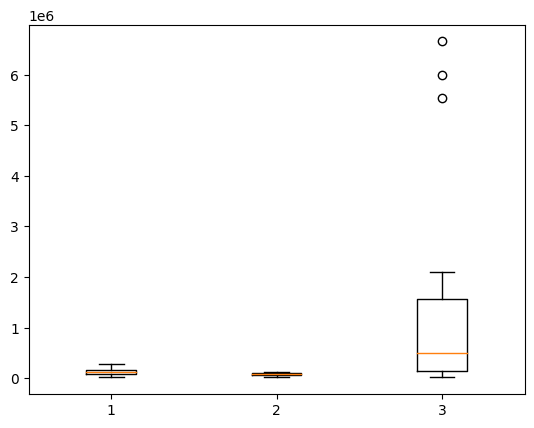

In [ ]:
salarys = df.groupby('position').agg({'base_salary': ['mean', 'median', 'max']})
plt.boxplot(salarys)

## 3. Preprocesamiento de Datos:

## 4. Evaluación de Modelos

## Conclusiones